## Project IV - MNIST Image Classification

Christian Voldby, 202004800

In [1]:
# Imports
import matplotlib.pyplot as plt
import gzip
import struct as st
import json
import random

### a.

The download is complete.

### b.

In [2]:
def read_labels(filename):
    """
    This function return a list of the labels from the MNIST file. 
    It uses the gzip module to open the file. 
    Since magic number must be 2049 for the MNIST file, the struct module is applied.
    
    """
    with gzip.open(filename, "rb") as f:
        bytes = f.read(8)
        magic, size = st.unpack(">II", bytes)
        if magic != 2049:
            return "The magic number does not match the MNIST file."
        data = f.read()
        return list(data)

In [3]:
t10k_labels = read_labels("./t10k-labels-idx1-ubyte.gz")

print(t10k_labels[:10])

train_labels = read_labels("./train-labels-idx1-ubyte.gz")

print(train_labels[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


### c.

In [4]:
def read_images(filename):
    """
    This function return a list of lists of the images from the MNIST file.
    The return list is constructed such images[image][row][column].
    
    The gzip module is used to open the file.
    The struct module is used to check the magic number of the input file.
    
    """
    with gzip.open(filename, "rb") as f:
        bytes = f.read(8)
        magic, size = st.unpack(">II", bytes)
        if magic != 2051:
            return "The magic number does not match the MNIST file"
        data = f.read()
        data = list(data[8:])
        data = [[data[28 * i + j] for j in range(28)] for i in range(len(data) // 28)]
        data = [data[28 * i : 28 * (i + 1)] for i in range(len(data) // 28)]
        return data

In [5]:
t10k_images = read_images("./t10k-images-idx3-ubyte.gz")

train_images = read_images("./train-images-idx3-ubyte.gz")

### d.


In [6]:
def plot_images(images, labels):
    """
    This function plots the images and related labels in a heatmap. 
    
    The module matplotlib.pyplot is used.
    """
    for i in range(len(labels)):
        plt.imshow(images[i], cmap = "OrRd")
        plt.title(labels[i])
        plt.colorbar().set_ticks([])
        plt.axis("off")
        plt.show()

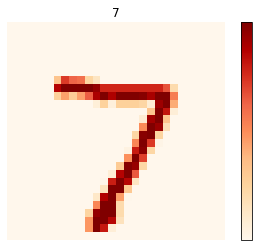

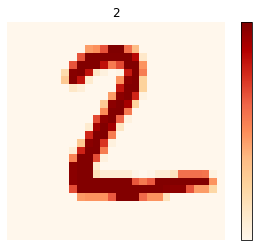

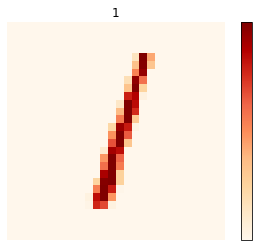

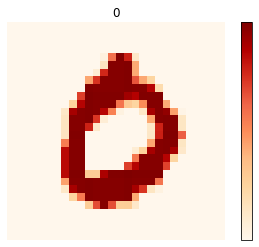

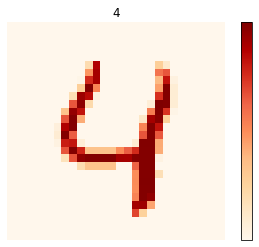

In [7]:
plot_images(t10k_images[:5], t10k_labels[:5])

### F.


In [8]:
def linear_load(file_name):
    """
    This function loads a linear classifier - a network. In this case a weights file.
    
    The JSON module is used.
    
    """
    with open(file_name) as f:
        data = json.load(f)
        return data

In [9]:
def linear_save(file_name, network):
    """
    This functions saves a linear classifier.
    
    The JSON module is used.
    """
    with open(file_name, "w") as outfile:
        outfile.write(json.dumps(network))

In [10]:
network = linear_load("./mnist_linear.weights")

### g.

Image_to_vector(image)

In [11]:
def image_to_vector(image):
    """
    This function return a image vector. 
    It turns a list of lists to a list and turns the values to floats [0,1]
    """
    image_vector = []
    for i in range(28):
        for j in range(28):
            image_vector.append(image[i][j] / 255)
    return image_vector

### h.

In [12]:
def add(U, V):
    """
    This function adds two vectors together and return the result in a new vector.
    """
    assert len(U) == len(V), "The dimensions of the vectors does not match"
    W = []
    for i in range(len(U)):
        W.append(U[i] + V[i])
    return W

In [13]:
def sub(U, V):
    """
    This function subtracts two vectors and return the result in a new vector.
    """
    assert len(U) == len(V), "The dimensions of the vectors does not match"
    W = []
    for i in range(len(U)):
        W.append(U[i] - V[i])
    return W

In [14]:
def scalar_multiplication(scalar, V):
    """
    This function performs scalar multiplication.
    """
    W = []
    for i in range(len(V)):
        W.append(scalar * V[i])
    return W

In [15]:
def multiply(V, M):
    """
    This function multiplies a vector onto a matrix.
    """
    assert len(V) == len(M), "The dimensions does not fit"
    W = []
    for i in range(len(M[0])):
        res = 0
        for j in range(len(M)):
            res += V[j] * M[j][i]
        W.append(res)
    return W

In [16]:
def transpose(M):
    """
    This function transposes a matrix.
    """
    M1 = []
    for i in range(len(M[0])):
        for j in range(len(M)):
            M1.append(M[j][i])
    M1 = [[M1[len(M) * i + j] for j in range(len(M))] for i in range(len(M1) // len(M))]
    return M1
            

### i.



In [17]:
def mean_square_error(U, V):
    """
    This function calculates the MSE between two vectors.
    """
    assert len(U) == len(V)
    
    sm = 0
    for i in range(len(U)):
        sm += (U[i] - V[i]) ** 2
    sm /= 10
    return sm
    

### j.



In [18]:
def argmax(V):
    """
    This function returns the index of the maximal value of a list.
    """
    return list.index(V, max(V))

### k.



In [19]:
def categorical(label, classes = 10):
    """
    This function returns a vector of length classes with all entries being 0 expect entry label.
    
    """
    L = []
    for i in range(classes):
        if i == label:
            L.append(1)
        else:
            L.append(0)
    return L

### l.


In [20]:
def predict(network, image):
    """
    This function returns xA + b given a network and a image vector.
    
    """
    return add(multiply(image, network[0]), network[1])

### m.


In [21]:
def evaluate(network, images, labels):
    """
    This function returns a tuple of predictions, cost and accuracy.
    
    The function evaluate the network.
    
    """
    predictions = []
    for i in range(len(images)):
        predictions.append(argmax(predict(network, image_to_vector(images[i]))))
    
    cost = []
    for i in range(len(images)):
        cost.append(mean_square_error(predict(network, image_to_vector(images[i])), categorical(labels[i])))
    cost = sum(cost) / len(cost)
    
    accuracy = sum(map(lambda x: x == 0, sub(predictions, labels))) / len(labels)
    
    return (predictions, cost, accuracy)

In [22]:
print(evaluate(network, t10k_images, t10k_labels)[1:])

(230.27520330872153, 0.926)


### n.



In [23]:
def plot_images_prediction(images, labels, predictions = None):
    """
    This functions extends the previous plot_images function with a optional prediction argument.

    """
    for i in range(len(labels)):
        plt.imshow(images[i], cmap = "OrRd")
        if predictions != None:
            plt.title((labels[i], "The prediction:", predictions[i]))
        else:
            plt.title(labels[i])
        plt.colorbar().set_ticks([])
        plt.axis("off")
        plt.show()
    

### o.

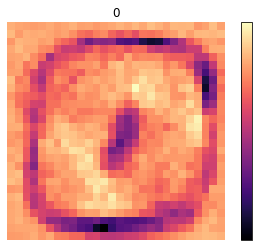

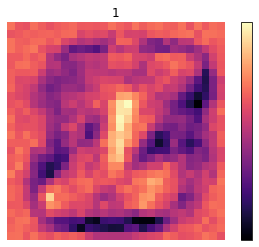

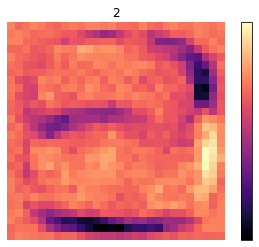

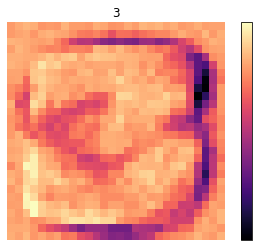

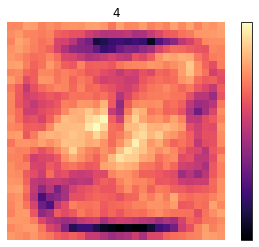

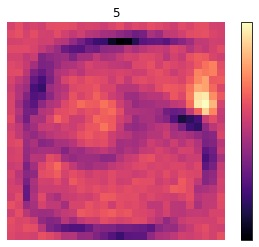

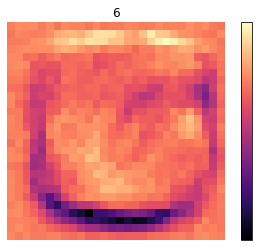

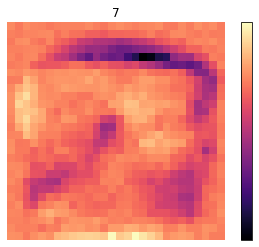

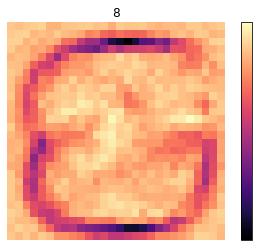

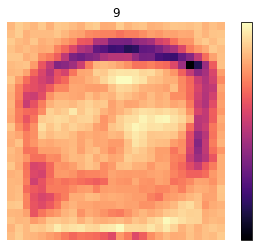

In [24]:
for i in range(10):
    m = []
    for j in range(784):
        m.append(network[0][j][i])
    m = [[m[28 * i + j] for j in range(28)] for i in range(len(m) // 28)]
    plt.imshow(m, cmap = "magma")
    plt.title(i)
    plt.colorbar().set_ticks([])
    plt.axis("off")
    plt.show()

### p.


In [25]:
def create_batches(values, batch_size):
    """
    This function partitions a list of values into batches. 
    The list is permuted prior to being cut into batches.
    
    The random module is used.
    """
    random.shuffle(values)
    
    batches = [values[i * batch_size:(i + 1) * batch_size] for i in range((len(values) + batch_size - 1) // batch_size)]
    
    return batches

### q.



In [26]:
def update(network, images, labels):
    """
    This function return a updated network.
    """
    step_size = 0.1
    n = len(images)
    c = step_size * (1 / n)
    
    b = network[1]
    A = network[0]
    
    for k in range(n):
        x = image_to_vector(images[k])
        a = predict(network, x)
        y = categorical(labels[k])
        t = (x, a, y)
        
        for j in range(10):
            b[j] -= c * 2 * (a[j] - y[j]) / 10
        
        for i in range(784):
            for j in range(10):
                A[i][j] -= c * x[i] * 2 * (a[j] - y[j]) / 10
    
    return network
    

### r.



In [27]:
def learn(images, labels, epochs = 5, batch_size = 100):
    """
    This function teaches a random network. 
    
    The random module is used.
    """
    b = [random.uniform(0, 1) for i in range(10)]
    A = [[random.uniform(0, 1 / 784) for j in range(10)] for i in range(784)]
    network = [A,b]
    
    L = []
    
    for i in range(len(labels)):
        L.append([labels[i], images[i]])
    
    for _ in range(epochs):
        lst = create_batches(L, batch_size)
        for i in range(len(lst) // batch_size):
            images1 = []
            labels1 = []
            for j in range(batch_size):
                images1.append(lst[i][j][1])
                labels1.append(lst[i][j][0])
            n0 = network
            ev0 = evaluate(n0, t10k_images, t10k_labels)
            n1 = update(n0, images1, labels1)
            ev1 = evaluate(n1, t10k_images, t10k_labels)
            if ev0[2] < ev1[2]:
                linear_save("learn.weights", n1)
                print(ev1[1:])
                network = n1
            else:
                linear_save("learn.weights", n0)
                print(ev0[1:])
            
    return evaluate(network, t10k_images, t10k_labels)[1:]
    

In [28]:
learn(train_images, train_labels, epochs = 5, batch_size = 100)

(0.15728649404036524, 0.1589)
(0.10732326629008894, 0.3867)
(0.0957514878382189, 0.5295)
(0.0957514878382189, 0.5295)
(0.08957470652889343, 0.5679)
(0.08957470652889343, 0.5679)
(0.08532715302301105, 0.6277)
(0.08532715302301105, 0.6277)
(0.08186681273815147, 0.6582)
(0.08186681273815147, 0.6582)
(0.07927971965983849, 0.6697)
(0.07927971965983849, 0.6697)
(0.07701153969212396, 0.6793)
(0.07701153969212396, 0.6793)
(0.07514773438145012, 0.6836)
(0.07411430158120173, 0.6918)
(0.07411430158120173, 0.6918)
(0.07311061175858813, 0.6854)
(0.0716692962486345, 0.6881)
(0.07127533093870315, 0.6916)
(0.07050506743544781, 0.7118)
(0.069678787158046, 0.7148)
(0.069678787158046, 0.7148)
(0.0692453266634583, 0.7123)
(0.06845618071073023, 0.7196)
(0.06845618071073023, 0.7196)
(0.06744304994689249, 0.7238)
(0.06744304994689249, 0.7238)
(0.06678329198730773, 0.7253)
(0.06633980912883283, 0.7324)


(0.06633980912883283, 0.7324)